In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from collections import Counter
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [131]:
#feature extraction from text 
translator = str.maketrans('', '', string.punctuation)
with open('project.txt') as mytext:
    uni_text = mytext.read().translate(translator).split()
    uni_text2 = set(uni_text)  #list of each unique word 

In [149]:
len(uni_text)

2568

In [151]:
uni_text3 = list(uni_text2)[:50]

In [153]:
uni_filtered = [word for word in uni_text if word.isalpha()]

In [155]:
word_counts = Counter(uni_text)

In [175]:
df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])

In [181]:
words = {word: count for word, count in word_counts.items() if count > 1}
#words

In [259]:
df = pd.read_csv("airline_tweets.csv")

In [261]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: xlabel='airline_sentiment', ylabel='count'>

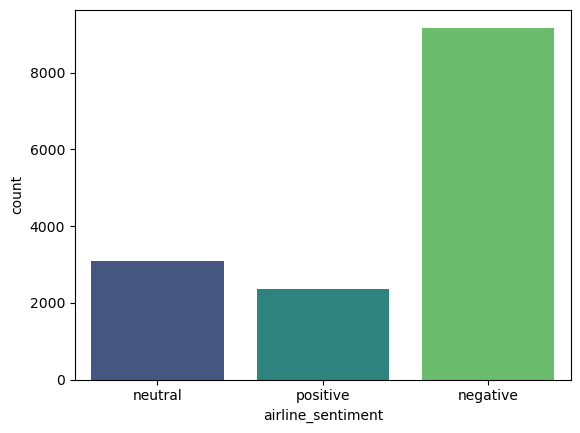

In [268]:
sns.countplot(data=df,x='airline_sentiment',hue='airline_sentiment',palette='viridis')

In [271]:
data = df[['airline_sentiment','text']]

In [274]:
y = df['airline_sentiment']
X = df['text']

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [278]:
tfidf = TfidfVectorizer(stop_words='english')

In [280]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [282]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [310]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

In [284]:
#naive bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [286]:
#log regression model 
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [288]:
#support vector class model
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [375]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds)) 
    cm = confusion_matrix(y_test, preds,normalize='true')
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Normalized Confusion Matrix')
    plt.show()

Naive Bayes Model
              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



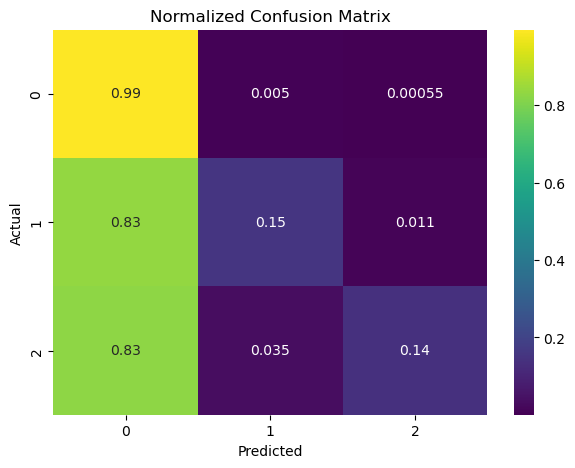

In [377]:
print("Naive Bayes Model")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.81      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



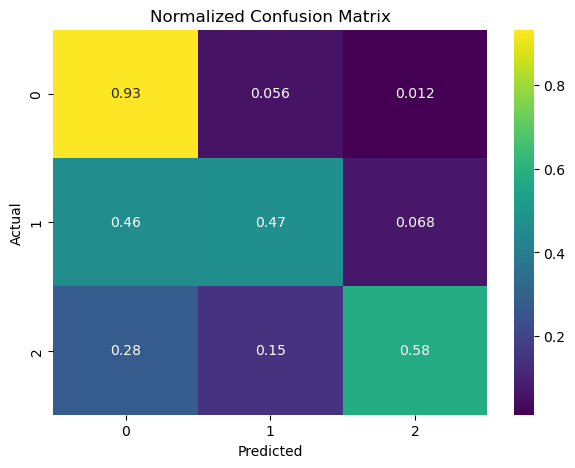

In [379]:
print("Logistic Regression")
report(log)

Support Vector Classification
              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



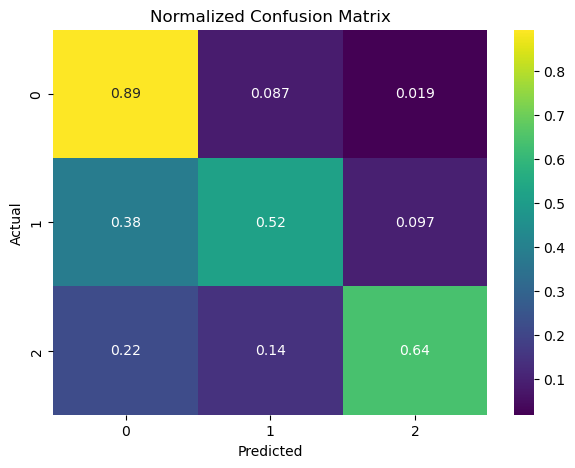

In [381]:
print("Support Vector Classification")
report(svc)